In [84]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt


In [85]:
data_path = '../../Data/Observational/Bernardi_SDSS/SDSS.csv'

df = pd.read_csv(data_path)

In [86]:
SersicIndex = df['Sersic_k']
StellarMass = df['logMstars_k']
z = df['z']


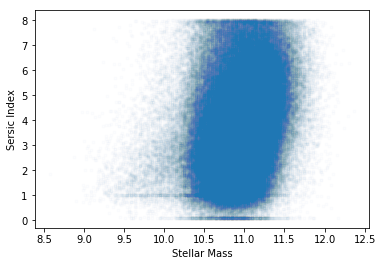

In [87]:
plt.figure()
plt.plot(StellarMass, SersicIndex, '.', alpha = 0.01)
plt.xlabel('Stellar Mass')
plt.ylabel('Sersic Index')

plt.show()

In [88]:
bins = np.arange(8.5, 12.5, 0.1)

array, binedges, number = stats.binned_statistic(StellarMass, SersicIndex, statistic = 'mean', bins = bins)
deviation, binedges, number = stats.binned_statistic(StellarMass, SersicIndex, statistic = 'std', bins = bins)


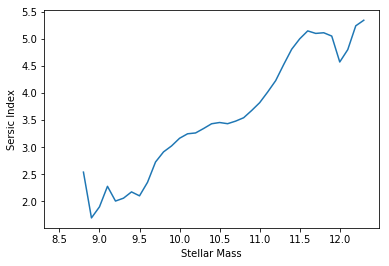

In [89]:
plt.figure()
plt.plot(bins[0:-1], array)
plt.xlabel('Stellar Mass')
plt.ylabel('Sersic Index')

plt.show()

In [90]:
Header = ["galcount", "z", "Vmaxwt", "MsMendSerExp", "AbsMag", "logReSerExp", "BT", "n_bulge", "newLcentsat", "NewMCentSat", "newMhaloL", "probaE", "probaEll", "probaS0", "probaSab", "probaScd", "TType", "AbsMagCent", "MsCent", "veldisp", "veldisperr", "AbsModel_newKcorr", "LCentSat", "raSDSS7", "decSDSS7", "Z", "sSFR", "FLAGsSFR", "MEDIANsSFR", "P16sSFR", "P84sSRF", "SFR", "FLAGSFR", "MEDIANSFR", "P16SFR", "P84SRF", "RA_SDSS", "DEC_SDSS", "Z_2", "Seperation"]

In [91]:
df = pd.read_csv("../../Data/Observational/Bernardi_SDSS/new_catalog_SFRs.dat", header = None, names = Header, delim_whitespace = True, skiprows = 1)

In [92]:
flag_central = df["LCentSat"] == 1.

SersicIndex = np.array(df['n_bulge'])
StellarMass = np.array(df['MsCent'])
VMax = np.array(df["Vmaxwt"])
Sizes = np.array(df['logReSerExp'])

flag_hasMass = StellarMass != -999.
flag_is8 = SersicIndex != 8.
flag_is0 = SersicIndex != 0.1
flag_type = np.array(df["TType"]) < 0. 


StellarMass = StellarMass[flag_hasMass * flag_is8 * flag_is0 * flag_central * flag_type]
SersicIndex = SersicIndex[flag_hasMass * flag_is8 * flag_is0 * flag_central * flag_type]
VMax = VMax[flag_hasMass * flag_is8 * flag_is0 * flag_central * flag_type]
Sizes = 10**Sizes[flag_hasMass * flag_is8 * flag_is0 * flag_central * flag_type]

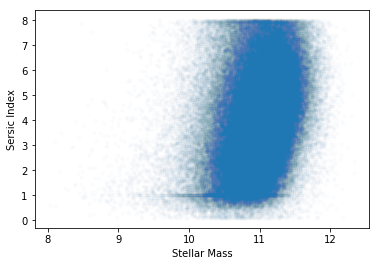

In [93]:
plt.figure()
plt.plot(StellarMass, SersicIndex, '.', alpha = 0.01)
plt.xlabel('Stellar Mass')
plt.ylabel('Sersic Index')
plt.show()

In [94]:
# Bin for Sersic Index

bins = np.arange(8.5, 12.5, 0.05)

array, edges, numbers = stats.binned_statistic(StellarMass, VMax*SersicIndex, statistic = 'sum', bins = bins)
den = stats.binned_statistic(StellarMass, VMax, statistic = 'sum', bins = bins)[0]

array = array/den

means = np.zeros(len(numbers))

for i in range(len(means)):
    means[i] = array[numbers[i]-1]

std_wrong = stats.binned_statistic(StellarMass, VMax*(SersicIndex - means)**2, statistic = 'sum', bins = bins)[0]
binCounts = stats.binned_statistic(StellarMass, means, statistic = 'count', bins = bins)[0]

dev = np.sqrt(std_wrong/(((binCounts-1)/binCounts)*den))

#std_right = std_wrong ** 2


/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


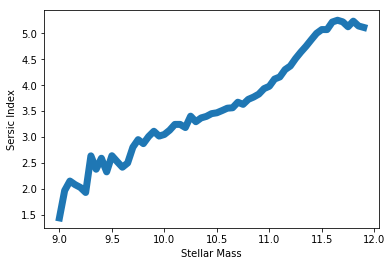

In [95]:
plt.figure()
plt.plot(bins[0:-1][10:-10], array[10:-10], linewidth=7.0)
plt.xlabel('Stellar Mass')
plt.ylabel('Sersic Index')

#plt.fill_between(bins[0:-1], array-dev, array+dev, alpha=0.2)

plt.show()

In [105]:
def FS_Size_0(M):
    return 0.1 * ((10**M)**0.14) * (1 + (10**M)/(3.98e10))**(0.39 - 0.14)

In [108]:
# Bin for radius

bins = np.arange(8.5, 12.5, 0.05)

array, edges, numbers = stats.binned_statistic(StellarMass, VMax*Sizes, statistic = 'sum', bins = bins)
den = stats.binned_statistic(StellarMass, VMax, statistic = 'sum', bins = bins)[0]

array = array/den

/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


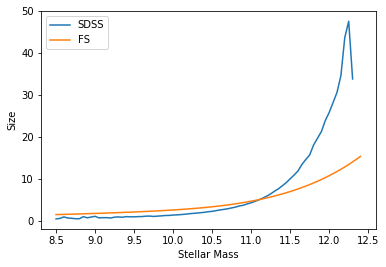

In [111]:
plt.figure()
plt.plot(bins[0:-1], array, label = 'SDSS')
plt.plot(bins[0:-1], FS_Size_0(bins[0:-1]), label = 'FS')
plt.xlabel('Stellar Mass')
plt.ylabel('Size')
plt.legend()

#plt.fill_between(bins[0:-1], array-dev, array+dev, alpha=0.2)

plt.show()